Import Libraries

In [197]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score,v_measure_score
from sklearn.manifold import TSNE

Read Data

In [198]:
X = pd.read_csv('/Users/siddhanthkalyanpur/Documents/CS584/HW3_Kalyanpur/mnist/test.dat', header = None, delim_whitespace = True)
X.shape

(10740, 1)

In [199]:
X= X.to_numpy()
nor = X.shape[0]
X = np.asarray([X[i][0].split(',') for i in range(nor)])
print(X.shape)

(10740, 784)


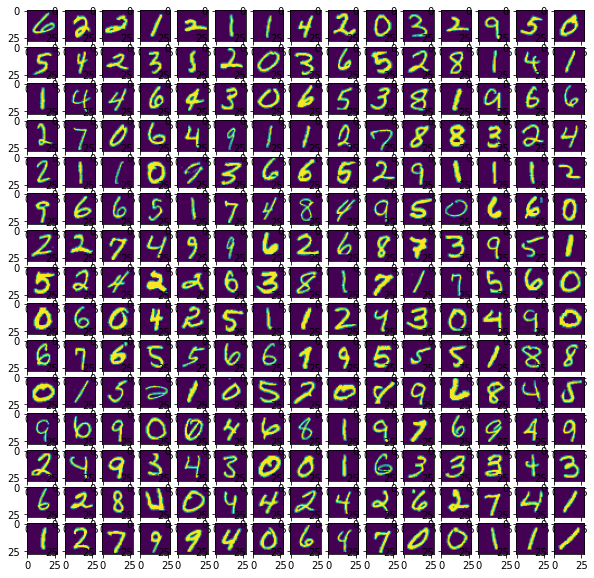

In [200]:
dig = X.reshape(X.shape[0], 28, 28)
figure, axis = plt.subplots(15, 15, figsize = (10, 10))

for i, a in enumerate(axis.flat):
    a.imshow(np.uint8(dig[i]))

Normalize

In [201]:
X = Normalizer().fit(X) .transform(X)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


PCA

In [202]:
X = PCA(n_components = 50).fit_transform(X.astype(float)/255)
print(X[0:5][0:5])

[[-4.62184988e-04  4.92127520e-04 -1.10849059e-03 -3.19326508e-04
   8.91086368e-04  7.33360998e-04 -5.47834681e-05 -2.95047218e-04
  -6.10247997e-05 -4.40978959e-04 -4.02627603e-05  1.15453995e-04
   3.70109598e-04  5.26084114e-04  1.31333852e-04 -8.44598778e-04
  -3.28342981e-04 -4.52186172e-04  5.23390978e-04  3.77777799e-04
   4.16515804e-04  4.48745425e-06  3.33714088e-04 -1.99134302e-04
  -1.93994138e-04 -2.71840135e-05 -2.67350835e-04  1.12829656e-05
  -6.28856374e-06 -3.29504246e-04 -7.38568114e-04  1.27938465e-04
  -2.39018067e-04 -3.58404669e-04 -2.79673203e-04  1.70586538e-05
  -1.19960618e-04 -5.15518565e-05 -2.48736828e-04 -2.35399439e-05
  -2.37409420e-04  2.02050279e-04  6.33791198e-05 -4.25064412e-04
  -8.36458305e-05 -1.71244061e-04 -7.28247307e-05 -2.15306266e-04
   1.06501184e-04  2.90007331e-04]
 [-4.55499279e-04 -1.05572237e-04 -1.56726300e-04  5.13650990e-05
  -1.81121522e-04  1.49995091e-04  1.22694179e-03  1.57059584e-04
  -1.23331241e-04 -3.77014548e-04 -7.8761

In [203]:
print(X.shape)

(10740, 50)


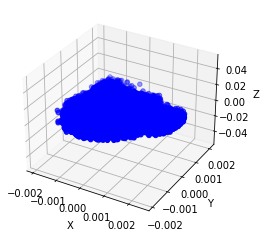

In [204]:
figure = plt.figure()
plot = figure.add_subplot(projection = '3d')
plot.scatter(X[:, 0], X[:, 1], c = 'blue')
plot.set_xlabel('X')
plot.set_ylabel('Y')
plot.set_zlabel('Z')
plt.show()

In [205]:
preprocessed_data = TSNE(random_state = 0,n_components = 2).fit_transform(X)
print(preprocessed_data.shape)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10740, 2)


<Figure size 432x288 with 0 Axes>

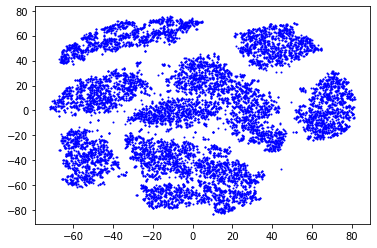

In [206]:
fig = plt.figure()
cmap = plt.cm.get_cmap('hsv', 10)
fig, axes = plt.subplots()
axes.scatter(preprocessed_data[:, 0], preprocessed_data[:, 1],  s = 1, c = 'blue')

In [ ]:
ss = []
for k in [2,4,6,8,10,12,14,16,18,20]:
  cluster_labels,centroids = KMeans(X,k,10)
  # cluster_labels,centroids = KMeans_plus(X,k,10)
  score = silhouette_score(preprocessed_data, cluster_labels, metric='cosine')
  print(k,":",score)
  ss.append(score)

In [208]:
print(cluster_labels)

[0. 0. 0. ... 0. 0. 0.]


K Means Algorithm

In [210]:
def KMeans(X,k,n):    
    cluster = np.zeros(X.shape[0])
    centroids = X[random.sample(range(0, X.shape[0]-1), k), :]
    d = 1
    while d != 0:
        for i, data in enumerate(X):
            dist = []
            for i in range(k):
                d1 = (data[0] - centroids[i][0]) ** 2
                d2 = (data[1] - centroids[i][1]) ** 2
                dist.append(np.sqrt(d1+d2))
            cluster[i] = dist.index(min(dist))
        nc = pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroids-nc) == 0:
            d = 0
        else:
            centroids = nc
        return cluster, centroids

K Means ++ Algorithm

In [211]:
def KMeans_plus(X,k,n):
    i=random.randint(0,X.shape[0])
    centroid=np.array([X.iloc[i, :]])
    K=3
    for k in range(1,K):
        D=np.array([]) 
        for x in X:
            D=np.append(D,np.min(np.sum((x-centroid)**2)))
        p=D/np.sum(D)
        cummulative_prob=np.cumsum(p)
        r=random.random()
        i=0
        for j,p in enumerate(cummulative_prob):
            if r<p:
                i=j
                break
        centroid=np.append(centroid,[X.iloc[i, :]],axis=0)
    
    centroid = pd.DataFrame(centroid)
    d = 1
    count = 0
    while d != 0:
        for idx, data in X.iterrows():
            distance = []
            for c, centroid in centroid.iterrows():
                d1 = (data[0] - centroid[0]) ** 2
                d2 = (data[1] - centroid[1]) ** 2
                distance.append(np.sqrt(d1+d2))
            cluster[idx] = distance.index(min(distance))
        nc = pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroid-nc) == 0:
            d = 0
        else:
            centroid = pd.DataFrame(nc)
        return cluster, centroid

In [168]:
file = open('output.txt','w')

for cluster in cluster_labels:
    file.write(str(int(cluster + 1)))
    file.write('\n')
        
file.close()

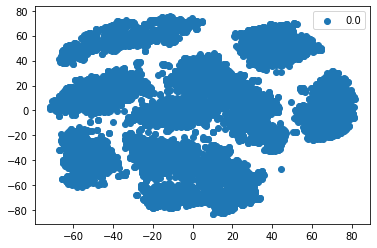

In [216]:
u_labels = np.unique(cluster_labels)
 
for i in u_labels:
    plt.scatter(preprocessed_data[cluster_labels == i , 0] , preprocessed_data[cluster_labels == i , 1] , label = i)
plt.legend()
plt.show()